
Number of POI in the dataset: 18

Number of non-POI in the dataset: 128
METTS MARK                     mark.metts@enron.com
BAXTER JOHN C                                     0
ELLIOTT STEVEN             steven.elliott@enron.com
CORDES WILLIAM R              bill.cordes@enron.com
HANNON KEVIN P               kevin.hannon@enron.com
MORDAUNT KRISTINA M     kristina.mordaunt@enron.com
MEYER ROCKFORD G           rockford.meyer@enron.com
MCMAHON JEFFREY           jeffrey.mcmahon@enron.com
HAEDICKE MARK E             mark.haedicke@enron.com
PIPER GREGORY F                greg.piper@enron.com
HUMPHREY GENE E             gene.humphrey@enron.com
NOLES JAMES L                                     0
BLACHMAN JEREMY M         jeremy.blachman@enron.com
SUNDE MARTIN                  marty.sunde@enron.com
GIBBS DANA R                   dana.gibbs@enron.com
LOWRY CHARLES P                                   0
COLWELL WESLEY                wes.colwell@enron.com
MULLER MARK S                   s..muller@e

 OR


[0.0404849  0.0277988  0.00371197 0.         0.         0.08490436
 0.00263955 0.         0.04904799 0.         0.         0.0709039
 0.01502709 0.0431701  0.03560262 0.01238614 0.         0.02290027
 0.01457004]


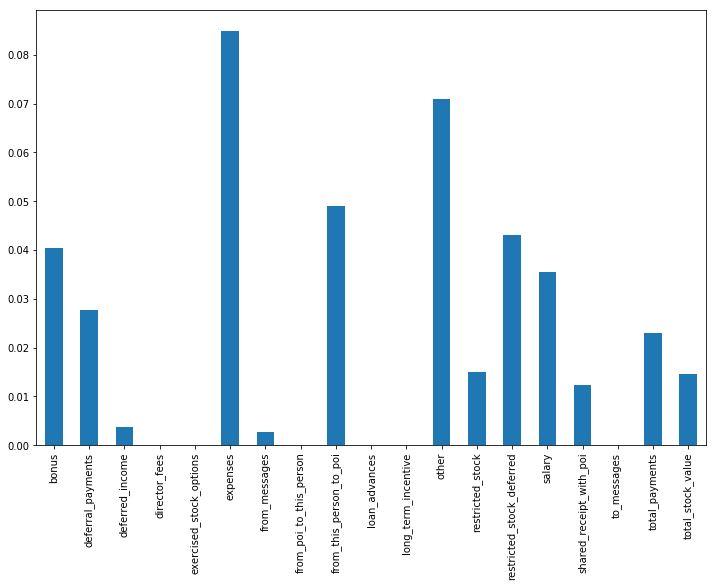


print ('X:
', X)
print ('Y:
', Y)
print ('X Train:
', X_train)
print ('X Test:
', X_test)
print ('Y Train:
', Y_train)
print ('Y Test:
', Y_test)



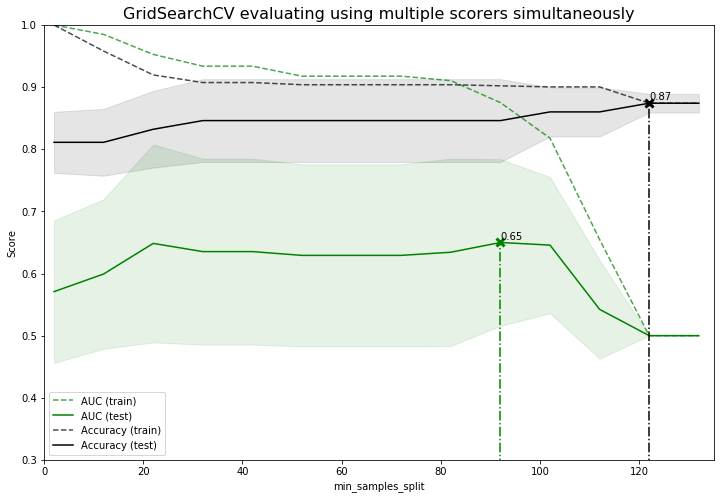


----------+-- ADABOOST CLASSIFIER --+-----------
Accuracy:        0.7906976744186046
Precision:       0.2222222222222222
Recall:          0.5
F1:              0.30769230769230765
Confusion Matrix:
 [[32  7]
 [ 2  2]]

----------+--    DECISION TREE   --+-----------
Accuracy:        0.8372093023255814
Precision:       0.2
Recall:          0.25
F1:              0.22222222222222224
Confusion Matrix:
 [[35  4]
 [ 3  1]]

----------+-- GAUSSIAN NAIVE BAYES --+-----------
Accuracy:        0.8372093023255814
Precision:       0.2
Recall:          0.25
F1:              0.22222222222222224
Confusion Matrix:
 [[35  4]
 [ 3  1]]

----------+--    RANDOM FOREST   --+-----------
Accuracy:        0.8837209302325582
Precision:       0.3333333333333333
Recall:          0.25
F1:              0.28571428571428575
Confusion Matrix:
 [[37  2]
 [ 3  1]]

----------+--        SVC        --+-----------
Accuracy:        0.9069767441860465
Precision:       0.0
Recall:          0.0
F1:              nan
Confusion

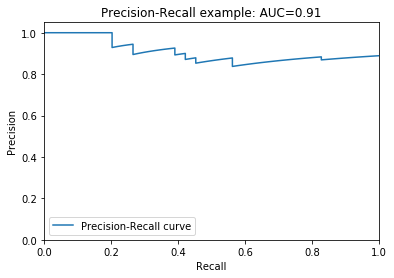

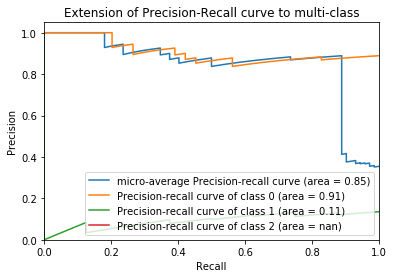

TypeError: write() argument must be str, not bytes

In [17]:
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export
from sklearn.model_selection import train_test_split, StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve, average_precision_score
from sklearn.utils.fixes import signature
from sklearn.neighbors import KNeighborsClassifier
import pickle


### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['bonus', 'deferral_payments', 'deferred_income', 'director_fees',
                 'email_address', 'exercised_stock_options', 'expenses',
                 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi',
                 'loan_advances', 'long_term_incentive', 'other', 'restricted_stock',
                 'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi',
                 'to_messages', 'total_payments', 'total_stock_value']

labels_list = ['poi']


### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)



data = pd.DataFrame.from_dict(data_dict, orient = 'index')
f = open('poi_names.txt', 'r')

"""
print ('\nSalary:', data['salary'])
print '\nFrom messages:', (data['from_messages'])
print '\nHead:', data.head()
print '\nInfo:', data.info()
print '\nDescribe:\n:', data.describe().transpose()

print '\nColumns:', list(data.columns.values)
print '\nShape:', data.shape
"""
print ('\nNumber of POI in the dataset:', (data['poi'] == 1).sum())
print ('\nNumber of non-POI in the dataset:', (data['poi'] == 0).sum())


### Task 2: Remove outliers
#comparison between salary and bonus before exclusion of outliers
#k-means clusters the input features we want to use
### can be any key in the person-level dictionary (salary, director_fees, etc.)


feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, features_list = targetFeatureSplit( data )
for f1, f2 in features_list:
    """
    plt.scatter( f1, f2 )
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.show()
"""
feature_1 = "salary"
feature_2 = "bonus"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, features_list = targetFeatureSplit( data )
for f1, f2 in features_list:
    """
    plt.scatter( f1, f2 )
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.show()
"""

# 2.2 Function to remove outliers
def remove_outlier(dict_object, keys):
    """ removes list of outliers keys from dict object """
    for key in keys:
        dict_object.pop(key, 0)

outliers = ['TOTAL', 'THE TRAVEL AGENCY IN THE PARK', 'LOCKHART EUGENE E']
remove_outlier(data_dict, outliers)

#comparison between salary and bonus after exclusion of outliers

feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, features_list = targetFeatureSplit( data )
for f1, f2 in features_list:
    """
    plt.scatter( f1, f2 )
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.show()
"""
feature_1 = "salary"
feature_2 = "bonus"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, features_list = targetFeatureSplit( data )
for f1, f2 in features_list:
    """
    plt.scatter( f1, f2 )
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.show()
"""


### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict

def compute_fraction(poi_messages, all_messages):
##return fraction of messages from/to that person to/from POI

    if poi_messages == 'NaN' or all_messages == 'NaN':
        return 0.
    fraction = poi_messages / all_messages
    return fraction

for name in my_dataset:
    data_point = my_dataset[name]
    from_poi_to_this_person = data_point["from_poi_to_this_person"]
    to_messages = data_point["to_messages"]
    fraction_from_poi = compute_fraction(from_poi_to_this_person, to_messages)
    data_point["fraction_from_poi"] = fraction_from_poi
    from_this_person_to_poi = data_point["from_this_person_to_poi"]
    from_messages = data_point["from_messages"]
    fraction_to_poi = compute_fraction(from_this_person_to_poi, from_messages)
    data_point["fraction_to_poi"] = fraction_to_poi



my_features_list = features_list + ['fraction_from_poi','fraction_to_poi']



# fed up with dictionary i continue with pandas
data = pd.DataFrame(my_dataset)
data = data.transpose()
data.fillna(value=0, inplace=True)
data.replace(to_replace='NaN', value=0, inplace=True)

#print  'Imprime 5 primeiras linhas:\n', data.head()
#print '\nDescribe:\n', data.describe().transpose()
#print data.info()
#pd.isnull(data['total_stock_value'])
#print  (Imprime 5 primeiras linhas:\n', data.head().transpose()

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_features = LabelEncoder()

features_list_0 = ['bonus', 'deferral_payments', 'deferred_income', 'director_fees',
                 'email_address', 'exercised_stock_options', 'expenses',
                 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi',
                 'loan_advances', 'long_term_incentive', 'other', 'restricted_stock',
                 'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi',
                 'to_messages', 'total_payments', 'total_stock_value']

features_list_1 = ['bonus', 'deferral_payments', 'deferred_income', 'director_fees', 'email_address',
                   'exercised_stock_options', 'expenses', 'fraction_from_poi',
                   'fraction_to_poi', 'from_messages', 'from_poi_to_this_person',
                   'from_this_person_to_poi', 'loan_advances', 'long_term_incentive', 'other',
                   'restricted_stock', 'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi',
                   'to_messages', 'total_payments', 'total_stock_value' ]


features_list_2 = ['bonus', 'exercised_stock_options', 'expenses', 'email_address',
                   'from_this_person_to_poi', 'loan_advances', 'long_term_incentive',
                   'other', 'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi',
                   'total_stock_value']

labels = data.iloc[:, 15].values
labelencoder_labels = LabelEncoder()
labels = labelencoder_labels.fit_transform(labels)

from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
lab_enc.fit(data['poi'])
variable = lab_enc.transform(data['poi'])
data['poi'] = variable
#print data['poi']
Y = np.array(labels)


#data['email_address'] = labelencoder_features.fit_transform(data['email_address'])
#onehotencoder = OneHotEncoder(categorical_features=['email_address'])

print (data['email_address'])

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical = list(data.select_dtypes(include=numerics).columns)
data = data[numerical]
print (data.head())
print (data.info())


OR = ['fraction_from_poi', 'fraction_to_poi', 'poi']
NF = ['poi']
TB = ['deferral_payments', 'deferred_income',
'fraction_from_poi', 'fraction_to_poi', 'from_messages', 'from_poi_to_this_person',
'loan_advances', 'restricted_stock_deferred', 'to_messages', 'total_payments' , 'poi']


print ('Digite:')
print ('        OR para dados originais,')
print ('        NF para com novas features ou')
print ('        TB para melhores features.')
X = data.drop(eval(input()), axis=1)
Y = data['poi']
#print X
#print Y

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)


from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_train.fillna(0), Y_train)
print (mi)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending = True)
mi.plot.bar(figsize=(12,8));
plt.show()

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = preprocessing.MinMaxScaler()
features = scaler.fit_transform(X)
X = features
#scaler = StandardScaler()
#features = scaler.fit_transform(X)

"""
print ('X:\n', X)
print ('Y:\n', Y)
print ('X Train:\n', X_train)
print ('X Test:\n', X_test)
print ('Y Train:\n', Y_train)
print ('Y Test:\n', Y_test)
"""

import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_hastie_10_2
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

print(__doc__)

# The scorers can be either be one of the predefined metric strings or a scorer
# callable, like the one returned by make_scorer
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

# Setting refit='AUC', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``gs.best_estimator_`` along with
# parameters like ``gs.best_score_``, ``gs.best_params_`` and
# ``gs.best_index_``
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid={'min_samples_split': range(2, 135, 10)},
                  scoring=scoring, cv=5, refit='AUC', return_train_score=True)
gs.fit(X, Y)
results = gs.cv_results_
#Plotting the result
plt.figure(figsize=(12, 8))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",
          fontsize=16)

plt.xlabel("min_samples_split")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, 135)
ax.set_ylim(0.30, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_min_samples_split'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()


### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html
# Provided to give you a starting point. Try a variety of classifiers.

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

features_list = ['poi','salary','to_messages', 'deferral_payments',
                'total_payments','exercised_stock_options','bonus','restricted_stock',
                'shared_receipt_with_poi','total_stock_value','expenses',
                'other','from_this_person_to_poi','deferred_income','long_term_incentive',
                'from_poi_to_this_person','loan_advances']

data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)


## Gaussian Classifier

## Gaussian Classifier
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, Y_train)
g_pred = clf.predict(X_test)
g_accuracy = accuracy_score(Y_test, g_pred)
g_precision = precision_score(Y_test, g_pred)
g_recall = recall_score(Y_test, g_pred)
g_F1 = 2 * (g_precision * g_recall) / (g_precision + g_recall)
g_matrix = confusion_matrix(Y_test, g_pred)

### Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state=42)
clf.fit(X_train, Y_train)
a_pred = clf.predict(X_test)
a_accuracy = accuracy_score(Y_test, a_pred)
a_precision = precision_score(Y_test, a_pred)
a_recall = recall_score(Y_test, a_pred)
a_F1 = 2 * (a_precision * a_recall) / (a_precision + a_recall)
a_matrix = confusion_matrix(Y_test, a_pred)

### Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0) #n_estimators=10, criterion='entropy',
clf.fit(X_train, Y_train)
r_pred = clf.predict(X_test)
r_accuracy = accuracy_score(Y_test, r_pred)
r_precision = precision_score(Y_test, r_pred)
r_recall = recall_score(Y_test, r_pred)
r_F1 = 2 * (r_precision * r_recall) / (r_precision + r_recall)
r_matrix = confusion_matrix(Y_test, r_pred)


### Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, Y_train)
dt_pred = clf.predict(X_test)
dt_accuracy = accuracy_score(Y_test, dt_pred)
dt_precision = precision_score(Y_test, dt_pred)
dt_recall = recall_score(Y_test, dt_pred)
dt_F1 = 2 * (dt_precision * dt_recall) / (dt_precision + dt_recall)
dt_matrix = confusion_matrix(Y_test, dt_pred)


clf = SVC(kernel = 'rbf', random_state = 1, C = 0.2)
clf.fit(X_train, Y_train)
svc_pred = clf.predict(X_test)
svc_accuracy = accuracy_score(Y_test, svc_pred)
svc_precision = precision_score(Y_test, svc_pred)
svc_recall = recall_score(Y_test, svc_pred)
svc_F1 = 2 * (svc_precision * svc_recall) / (svc_precision + svc_recall)
svc_matrix = confusion_matrix(Y_test, svc_pred)


clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
clf.fit(X_train, Y_train)
kne_pred = clf.predict(X_test)
kne_accuracy = accuracy_score(Y_test, kne_pred)
kne_precision = precision_score(Y_test, kne_pred)
kne_recall = recall_score(Y_test, kne_pred)
kne_F1 = 2 * (kne_precision * kne_recall) / (kne_precision + kne_recall)
kne_matrix = confusion_matrix(Y_test, kne_pred)



## Evaluate Initial Classifiers


print ("\n----------+-- ADABOOST CLASSIFIER --+-----------")
print ("Accuracy:       ", a_accuracy)
print ("Precision:      ", a_precision)
print ("Recall:         ", a_recall)
print ("F1:             ", a_F1)
print ("Confusion Matrix:\n", a_matrix)

print ("\n----------+--    DECISION TREE   --+-----------")
print ("Accuracy:       ", dt_accuracy)
print ("Precision:      ", dt_precision)
print ("Recall:         ", dt_recall)
print ("F1:             ", dt_F1)
print ("Confusion Matrix:\n", dt_matrix)

print ("\n----------+-- GAUSSIAN NAIVE BAYES --+-----------")
print ("Accuracy:       ", g_accuracy)
print ("Precision:      ", g_precision)
print ("Recall:         ", g_recall)
print ("F1:             ", g_F1)
print ("Confusion Matrix:\n", g_matrix)

print ("\n----------+--    RANDOM FOREST   --+-----------")
print ("Accuracy:       ", r_accuracy)
print ("Precision:      ", r_precision)
print ("Recall:         ", r_recall)
print ("F1:             ", r_F1)
print ("Confusion Matrix:\n", r_matrix)

print ("\n----------+--        SVC        --+-----------")
print ("Accuracy:       ", svc_accuracy)
print ("Precision:      ", svc_precision)
print ("Recall:         ", svc_recall)
print ("F1:             ", svc_F1)
print ("Confusion Matrix:\n", svc_matrix)

print ("\n----------+-- K NEIGHBORS CLASSIFIER --+-----------")
print ("Accuracy:       ", kne_accuracy)
print ("Precision:      ", kne_precision)
print ("Recall:         ", kne_recall)
print ("F1:             ", kne_F1)
print ("Confusion Matrix:\n", kne_matrix)

"""
dt1_clf = DecisionTreeClassifier(criterion='entropy', random_state=30)
dt1_clf.fit(X_train, Y_train)
prediction = dt1_clf.predict(X_test)
clf = DecisionTreeClassifier(criterion='entropy', random_state=30)
clf.fit(X, Y)
print ('Classificador Tree', clf.feature_importances_)


export.export_graphviz(dt1_clf, out_file = 'arvore.dot',
                       feature_names = ['bonus', 'exercised_stock_options', 'expenses', 'email_address',
                                          'from_this_person_to_poi', 'loan_advances', 'long_term_incentive',
                                          'other', 'restricted_stock_deferred', 'salary',
                                          'shared_receipt_with_poi', 'total_stock_value'
                                          ], class_names = ['False', 'True'], filled = True,
                       leaves_parallel=True)

"""

print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize the output
y = label_binarize(Y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=random_state)

# Run classifier
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, Y_train).decision_function(X_test)

# Compute Precision-Recall and plot curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# Compute micro-average ROC curve and ROC area
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,
                                                     average="micro")

# Plot Precision-Recall curve
plt.clf()
plt.plot(recall[0], precision[0], label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precision[0]))
plt.legend(loc="lower left")
plt.show()

# Plot Precision-Recall curve for each class
plt.clf()
plt.plot(recall["micro"], precision["micro"],
         label='micro-average Precision-recall curve (area = {0:0.2f})'
               ''.format(average_precision["micro"]))
for i in range(n_classes):
    plt.plot(recall[i], precision[i],
             label='Precision-recall curve of class {0} (area = {1:0.2f})'
                   ''.format(i, average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(loc="lower right")
plt.show()

### Task 5: Tune your classifier to achieve better than .3 precision and recall
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info:
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html



### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)
main()